Code di bawah digunakan untuk mengimport library seperti matplotlib yang berfungsi untuk membuat grafik atau menampilkan gambar, numpy untuk manipulasi array, dan openCV untuk manipulasi gambar

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

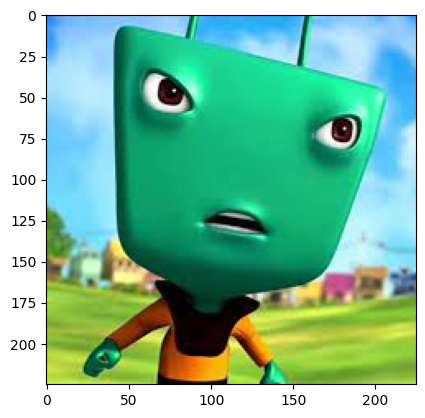

In [12]:
adudu = plt.imread("adudu.jpg")
plt.imshow(adudu)

<p style="text-align: justify;">
    Kode di bawah ini digunakan untuk membaca citra bernama "aduduGR" dari gambar "aduduGR.jpg" dan menyimpannya dalam variabel <code>aduduGR</code>. 
    Proses dimulai dengan membaca citra menggunakan fungsi <code>imread()</code> dari pustaka <code>pyplot</code>. 
    Selanjutnya, citra dikonversi ke skala keabuan (grayscale) menggunakan pustaka <code>cv</code>. 
    Terakhir, ukuran citra serta citra hasil konversi ditampilkan.
</p>

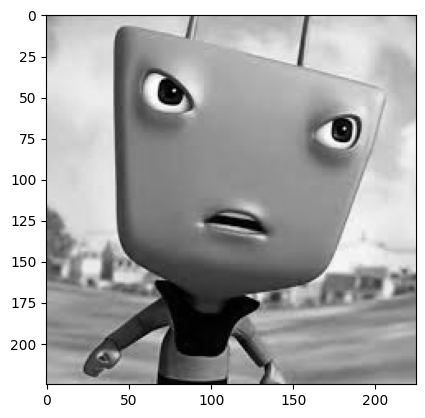

In [13]:
aduduGR = plt.imread("adudu.jpg")
aduduGR = cv.cvtColor(aduduGR, cv.COLOR_BGR2GRAY)
plt.imshow(aduduGR, cmap = 'gray')
aduduGR = np.pad(aduduGR,1)
height, width = aduduGR.shape
hasil = np.zeros((height, width), dtype=np.uint8)

Kode ini mendefinisikan berbagai kernel filter yang digunakan dalam pemrosesan gambar untuk efek perataan (smoothing) dan penajaman (sharpening). Kernel kernel3 dan kernel9 menghaluskan gambar dengan menghitung rata-rata piksel di sekitarnya, menghasilkan efek blur lembut. kernel_smoothing memberikan perataan dengan bobot lebih besar di bagian tengah, membantu mempertahankan detail gambar sambil mengurangi noise. kernel_sharpering meningkatkan kontras dengan memberikan bobot tinggi pada piksel pusat, sehingga membuat tepi dan fitur gambar lebih tajam. Kernel ini dapat diterapkan menggunakan teknik konvolusi untuk mengubah tampilan gambar sesuai kebutuha


In [14]:
kernel3 = np.ones((3, 3), np.float32) / 9
kernel9 = np.ones((9, 9), np.float32) / 81
kernel_smoothing = np.array([[1/10,1/10,1/10],
                         [1/10,1/5,1/10],
                         [1/10,1/10,1/10]])
kernel_sharpering = np.array([[1/9,1/9,1/9],
                         [1/9,8/9,1/9],
                         [1/9,1/9,1/9]])

Fungsi konvolusi menerapkan operasi konvolusi pada gambar menggunakan kernel tertentu. Gambar pertama-tama dipad dengan batas tambahan untuk memastikan kernel dapat diterapkan ke semua piksel, lalu dilakukan perhitungan berbasis iterasi. Setiap piksel dalam hasil akhir diperoleh dengan menjumlahkan elemen yang dipilih dari gambar yang telah dipad, dikalikan dengan kernel. Proses ini digunakan dalam pemrosesan gambar untuk efek seperti perataan (smoothing), penajaman (sharpening), atau deteksi tepi. 


In [15]:
def konvolusi(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height //2 
    pad_width = kernel_width //2
    padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode= 'edge')
    result = np.zeros([img_height, img_width])
    
    for i in range(img_height):
        for j in range(img_width):
            result [i,j] = np.sum(padded_img[i:i+kernel_height, j:j+kernel_width] * kernel)
    return result

Fungsi mean menerapkan filter rata-rata pada gambar menggunakan kernel tertentu. Setiap piksel diproses dengan mengambil area sekelilingnya sesuai ukuran kernel, lalu menghitung jumlah nilai piksel yang dikalikan dengan kernel untuk menghasilkan nilai baru. Proses ini membantu menghaluskan gambar dengan mereduksi variasi intensitas, menghasilkan efek perataan yang sering digunakan dalam pemrosesan gambar untuk mengurangi noise. 


In [16]:
def mean(img,kernel):
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[1]//2, width-kernel.shape[1]//2):
            temp = img[i - kernel.shape[0]//2:i + kernel.shape[0]//2 + 1, j - kernel.shape[0]//2:j + kernel.shape[0]//2 + 1]
            
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += kernel[k, l] * temp[k, l]
            hasil[i, j] = sum
    return hasil

Fungsi modus menerapkan filtering berbasis nilai modus pada citra menggunakan kernel tertentu. Setiap piksel diproses dengan mengambil area sekelilingnya dan menghitung frekuensi kemunculan setiap nilai piksel dalam jendela kernel. Nilai dengan kemunculan terbanyak (modus) ditetapkan sebagai nilai piksel baru, yang membantu mengurangi noise sambil mempertahankan detail penting dalam gambar. 


In [ ]:
def modus(img,kernel):
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[1]//2, width-kernel.shape[1]//2):
            temp = []
            for k in range(-kernel.shape[0]//2, kernel.shape[0]//2+1):
                for l in range(-kernel.shape[1]//2, kernel.shape[1]//2+1):
                    temp+=[img[i+k][j+l]]
                    
            counts = np.zeros(256)
            for val in temp:
                counts[val] += 1
            max_count = -1
            max_val = -1
            
            for val in range(256):
                count = counts[val]
                if count > max_count:
                    max_count = count
                    max_val = val
            hasil[i][j] = max_val

    return hasil

Fungsi median ini menerapkan median filtering pada gambar menggunakan kernel tertentu. Setiap piksel diproses dengan mengambil nilai dari lingkungan sekitarnya yang sesuai dengan ukuran kernel, lalu menyusun nilai-nilai tersebut dalam urutan naik. Setelah diurutkan, nilai tengah dalam daftar digunakan sebagai nilai baru untuk piksel, yang membantu menghilangkan noise sambil mempertahankan tepi dan detail penting dalam gambar.


In [18]:
def median(img,kernel):
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[0]//2, width-kernel.shape[0]//2):
            temp = []
            for k in range(-kernel.shape[0]//2, kernel.shape[0]//2+1):
                for l in range(-kernel.shape[0]//2, kernel.shape[0]//2+1):
                    temp+=[img[i+k][j+l]]
                    
            n = len(temp)
            for p in range(n - 1):
                min_idx = p
                for q in range(p + 1, n):
                    if temp[q] < temp[min_idx]:
                        min_idx = q
                temp_p = temp[p]
                temp[p] = temp[min_idx]
                temp[min_idx] = temp_p
                
            median = temp[kernel.shape[0]**2//2]
            if kernel.shape[0]**2 % 2 == 0:
                median = (temp[kernel.shape[0]**2//2 - 1] + temp[kernel.shape[0]**2//2]) // 2
            else:
                median = temp[kernel.shape[0]**2//2]
            hasil[i][j] = median

    return hasil

Kode ini membuat dua kernel kosong menggunakan np.full, yang menghasilkan array dengan ukuran tertentu yang seluruh elemennya memiliki nilai awal yang sama.


In [19]:
kernel03 = np.full((3,3), 0)
kernel09 = np.full((9,9), 0)

Kode ini menerapkan berbagai teknik pemrosesan gambar menggunakan filter dan operasi konvolusi pada citra aduduGR. Setiap pemrosesan memiliki tujuan yang berbeda:
- mean3x3 dan mean9x9 menerapkan filter rata-rata (mean) dengan kernel 3×3 dan 9×9, yang berfungsi untuk menghaluskan gambar dengan mengurangi variasi intensitas piksel.
- sharpening menggunakan konvolusi dengan kernel_sharpering, meningkatkan ketajaman gambar dengan memperjelas detail dan tepi.
- smoothing menerapkan konvolusi menggunakan kernel_smoothing, yang membantu mengurangi noise dan membuat transisi piksel lebih lembut.
- modus3x3 dan modus9x9 menerapkan filter berbasis modus, memilih nilai piksel yang paling sering muncul dalam jendela kernel untuk mempertahankan pola dominan dalam gambar.
- median3x3 dan median9x9 menggunakan filter median untuk menghilangkan noise dengan menetapkan nilai median dari piksel sekelilingnya.


In [ ]:
mean3x3 = mean(aduduGR, kernel3)
mean9x9 = mean(aduduGR, kernel9)
sharpening = konvolusi(aduduGR, kernel_sharpering)
smoothing = konvolusi(aduduGR, kernel_smoothing)
modus3x3 = modus(aduduGR, kernel03)
modus9x9 = modus(aduduGR, kernel09)
median3x3 = median(aduduGR, kernel03)
median9x9 = median(aduduGR, kernel09)

Kode ini membuat figure Matplotlib dengan 8 subplot, masing-masing menampilkan hasil dari berbagai teknik pemrosesan gambar menggunakan skala grayscale (cmap='gray'). Setiap subplot mewakili metode berbeda seperti mean filtering, sharpening, smoothing, modus filtering, dan median filtering.

Text(0.5, 1.0, 'Median 9x9')

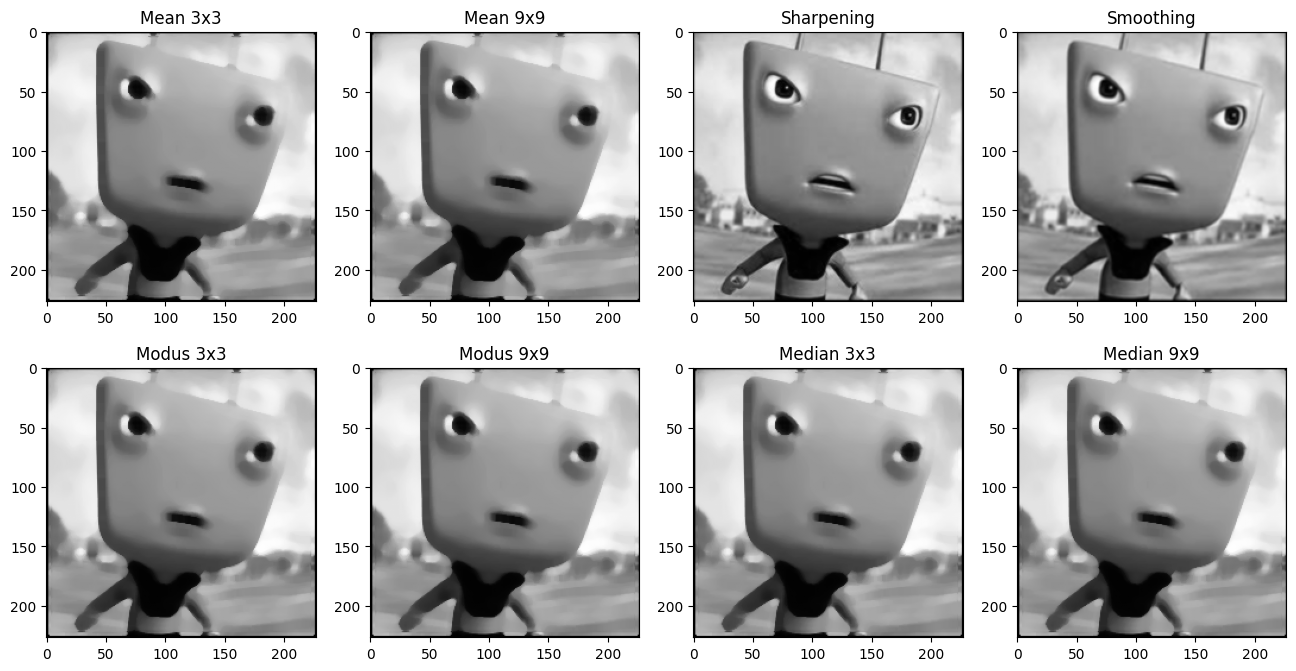

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(mean3x3, cmap='gray')
plt.title('Mean 3x3')
plt.subplot(2,4,2)
plt.imshow(mean9x9, cmap='gray')
plt.title('Mean 9x9')
plt.subplot(2,4,3)
plt.imshow(sharpening, cmap='gray')
plt.title('Sharpening')
plt.subplot(2,4,4)
plt.imshow(smoothing, cmap='gray')
plt.title('Smoothing')
plt.subplot(2,4,5)
plt.imshow(modus3x3, cmap='gray')
plt.title('Modus 3x3')
plt.subplot(2,4,6)
plt.imshow(modus9x9, cmap='gray')
plt.title('Modus 9x9')
plt.subplot(2,4,7)
plt.imshow(median3x3, cmap='gray')
plt.title('Median 3x3')
plt.subplot(2,4,8)
plt.imshow(median9x9, cmap='gray')
plt.title('Median 9x9')

Kernel SobelX dan SobelY adalah operator deteksi tepi yang digunakan dalam pemrosesan gambar. SobelX dirancang untuk menyoroti perubahan intensitas piksel dalam arah horizontal, membantu dalam identifikasi garis vertikal dalam gambar. Sebaliknya, SobelY mendeteksi perubahan dalam arah vertikal, memperjelas garis horizontal. Kedua kernel ini bekerja dengan menghitung perbedaan nilai piksel di sekitar setiap titik, menghasilkan gambar dengan tepi yang lebih tegas dan kontras tinggi. Teknik ini sering digunakan dalam algoritma deteksi fitur, pengolahan citra medis, dan sistem pengenalan objek.


In [22]:
sobelX = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

sobelY = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])


Kernel PrewittX dan PrewittY adalah operator deteksi tepi dalam pemrosesan gambar. PrewittX difokuskan pada perubahan intensitas piksel dalam arah horizontal, membantu mengidentifikasi garis vertikal. Sebaliknya, PrewittY menyoroti perubahan dalam arah vertikal, memperjelas garis horizontal. Tidak seperti Sobel, Prewitt menggunakan bobot yang sama di seluruh elemen kernel, menghasilkan deteksi tepi yang lebih sederhana dan kurang sensitif terhadap noise. Teknik ini sering digunakan dalam analisis citra untuk mengidentifikasi batas objek dengan lebih jelas. 


In [23]:
prewittX = np.array([[-1, 0, 1],
                  [-1, 0, 1],
                  [-1, 0, 1]])
prewittY = np.array([[1, 1, 1],
                  [0, 0, 0],
                  [-1, -1, -1]])

Kernel RobertsX dan RobertsY adalah operator deteksi tepi yang digunakan dalam pemrosesan gambar. RobertsX menyoroti perubahan intensitas piksel dalam arah diagonal utama, sementara RobertsY mendeteksi perubahan dalam arah diagonal sebaliknya. Dibandingkan Sobel atau Prewitt, metode Roberts lebih sederhana dengan ukuran kernel yang lebih kecil (2×2), membuatnya lebih efisien dalam mengidentifikasi tepi dengan perbedaan kontras tinggi.


In [24]:
robertsX = np.array([[1, 0],
                     [0,-1]])
robertsY = np.array([[0, 1],
                     [-1,0]])

<p style= "text-align: justify;">
Fungsi  <code>padding_baris(image)</code> digunakan untuk menambahkan satu kolom kosong di sebelah kanan sebuah citra dua dimensi (grayscale). Fungsi ini pertama-tama mengambil ukuran tinggi dan lebar dari gambar, kemudian membuat array baru dengan ukuran tinggi yang sama dan lebar ditambah satu, di mana semua elemen diisi dengan nol. Selanjutnya, fungsi ini menyalin setiap nilai dari gambar asli ke array baru, kolom demi kolom, tanpa mengubah nilai aslinya. Hasil akhirnya adalah gambar yang memiliki satu kolom tambahan di kanan yang seluruh elemennya bernilai nol. 
</p>

In [25]:
def padding_baris(image):
    height,width = image.shape
    padding = np.zeros((height,width +1))
    for i in range (height):
        for j in range (width):
            padding[i][j] = image[i][j]
    return padding

<p style= "text-align: justify;">
Fungsi <code> padding_kolom (image)</code> digunakan untuk menambahkan satu baris kosong di bagian bawah sebuah citra dua dimensi (biasanya citra grayscale). Langkah pertama dalam fungsi ini adalah mendapatkan ukuran tinggi dan lebar dari citra input. Kemudian, fungsi membuat array baru bernama padding yang memiliki jumlah baris satu lebih banyak dari citra asli, tetapi jumlah kolomnya tetap sama. Semua elemen dalam array baru ini diinisialisasi dengan nilai nol. Setelah itu, fungsi menyalin setiap elemen dari citra asli ke dalam array baru, menjaga posisi piksel tetap sama. Hasil akhirnya adalah citra baru yang memiliki satu baris tambahan di bawah, di mana seluruh nilai pada baris tersebut adalah nol. 
</p>

In [26]:
def padding_kolom(image):
    height,width = image.shape
    padding = np.zeros((height+1 ,width))
    for i in range (height):
        for j in range (width):
            padding[i][j] = image[i][j]
    return padding

Fungsi konvolusi_tepi menerapkan operasi konvolusi untuk deteksi tepi pada gambar menggunakan kernel tertentu. Jika metode yang digunakan bukan Roberts, gambar dipad dengan batas konstan agar kernel dapat diterapkan dengan benar. Untuk Roberts, padding khusus dilakukan menggunakan fungsi padding_baris dan padding_kolom. Setiap piksel dalam hasil akhir dihitung dengan menjumlahkan elemen yang dipilih dari gambar yang telah dipad, dikalikan dengan kernel yang diberikan. Teknik ini berguna untuk menyoroti tepi dan perubahan intensitas dalam citra. 


In [27]:
def konvolusi_tepi(image, kernel, jenis):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height //2
    pad_width = kernel_width //2
    if(jenis!="roberts"):
        padded_img =  np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    else:
        padded_baris = padding_baris(image)
        padded_img = padding_kolom(padded_baris)
    result = np.zeros([img_height, img_width])

    for i in range(img_height):
        for j in range(img_width):
            result[i, j] = np.sum(padded_img[i:i+kernel_height, j:j+kernel_width] * kernel)
    return result

Fungsi deteksi_tepi menerapkan deteksi tepi pada gambar menggunakan dua kernel—kernelX untuk deteksi horizontal dan kernelY untuk deteksi vertikal. Fungsi ini pertama-tama menjalankan konvolusi pada masing-masing kernel untuk menghasilkan dua gambar hasil (hasil1 dan hasil2). Kemudian, kedua hasil tersebut dikombinasikan menggunakan magnitude gradient dengan rumus M = sqrt(hasil1² + hasil2²) untuk memperoleh tepi yang lebih jelas dalam gambar.


In [ ]:
def deteksi_tepi(image, kernelX, kernelY, jenis):
    hasil1 = konvolusi_tepi(image, kernelX, jenis)
    hasil2 = konvolusi_tepi(image, kernelY, jenis)

    M = np.sqrt((hasil1*hasil1)+(hasil2*hasil2))
    return M

Kode ini menerapkan deteksi tepi Roberts pada berbagai hasil pemrosesan gambar. Setiap variabel menjalankan fungsi deteksi_tepi dengan kernel RobertsX dan RobertsY, yang menyoroti perbedaan intensitas piksel dalam arah diagonal. Teknik ini diterapkan pada gambar hasil dari berbagai metode filtering seperti mean, sharpening, smoothing, modus, dan median, masing-masing dengan ukuran kernel yang berbeda (3×3 dan 9×9). Pendekatan ini memungkinkan perbandingan efektivitas deteksi tepi pada gambar yang telah diproses sebelumnya. 


In [29]:
roberts_mean_3x3 = deteksi_tepi(mean3x3, robertsX, robertsY, "roberts")
roberts_mean_9x9 = deteksi_tepi(mean9x9, robertsX, robertsY, "roberts")
roberts_sharpening = deteksi_tepi(sharpening, robertsX, robertsY, "roberts")
roberts_smoothing = deteksi_tepi(smoothing, robertsX,robertsY, "roberts")
roberts_modus_3x3 = deteksi_tepi(modus3x3, robertsX, robertsY, "roberts")
roberts_modus_9x9 = deteksi_tepi(modus9x9, robertsX, robertsY, "roberts")
roberts_median_3x3 = deteksi_tepi(median3x3, robertsX, robertsY, "roberts")
roberts_median_9x9 = deteksi_tepi(median9x9, robertsX, robertsY, "roberts")


Kode ini membuat figure dengan 8 subplot, masing-masing menampilkan hasil deteksi tepi Roberts pada gambar yang telah melalui berbagai filter seperti mean, sharpening, smoothing, modus, dan median, dengan kernel berukuran 3×3 dan 9×9. Setiap subplot menggunakan skala grayscale (cmap='gray'), memungkinkan perbandingan efek dari metode filter yang berbeda terhadap deteksi tepi dalam gambar.


Text(0.5, 1.0, 'Roberts Median 9x9')

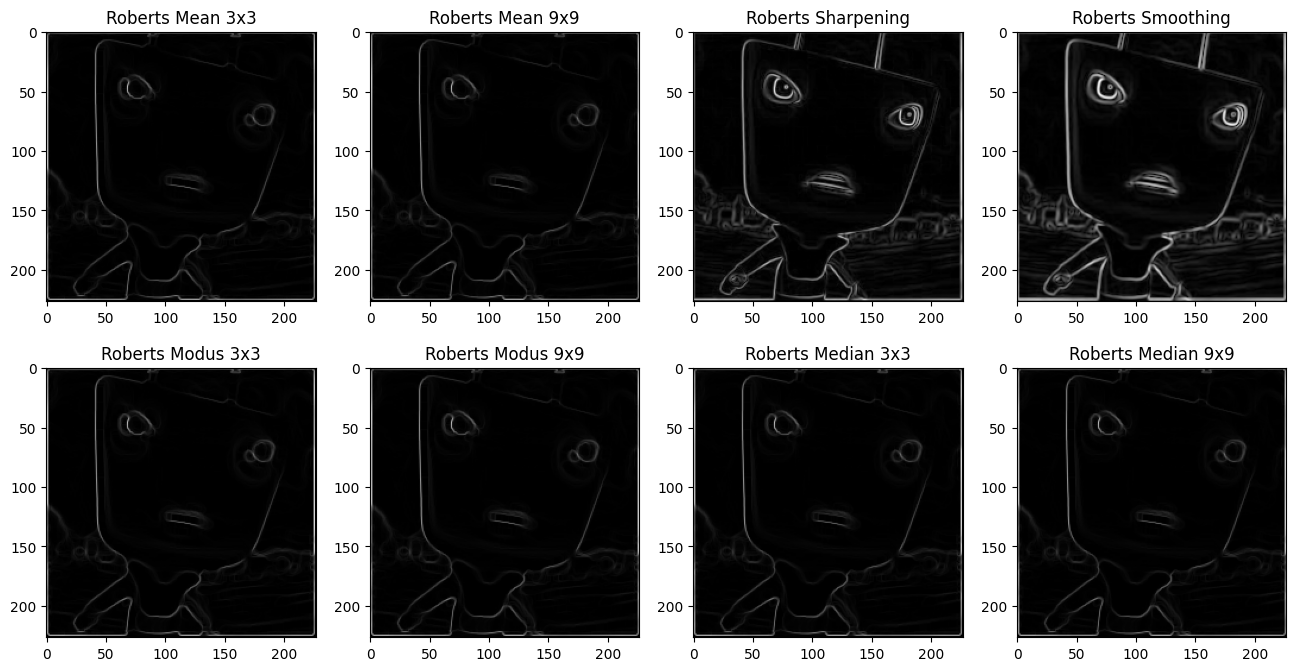

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(roberts_mean_3x3, cmap='gray')
plt.title('Roberts Mean 3x3')
plt.subplot(2,4,2)
plt.imshow(roberts_mean_9x9, cmap='gray')
plt.title('Roberts Mean 9x9')
plt.subplot(2,4,3)
plt.imshow(roberts_sharpening, cmap='gray')
plt.title('Roberts Sharpening')
plt.subplot(2,4,4)
plt.imshow(roberts_smoothing, cmap='gray')
plt.title('Roberts Smoothing')
plt.subplot(2,4,5)
plt.imshow(roberts_modus_3x3, cmap='gray')
plt.title('Roberts Modus 3x3')
plt.subplot(2,4,6)
plt.imshow(roberts_modus_9x9, cmap='gray')
plt.title('Roberts Modus 9x9')
plt.subplot(2,4,7)
plt.imshow(roberts_median_3x3, cmap='gray')
plt.title('Roberts Median 3x3')
plt.subplot(2,4,8)
plt.imshow(roberts_median_9x9, cmap='gray')
plt.title('Roberts Median 9x9')

Kode ini menerapkan deteksi tepi Sobel pada berbagai hasil pemrosesan gambar menggunakan fungsi deteksi_tepi. SobelX dan SobelY digunakan untuk mengidentifikasi perubahan intensitas dalam arah horizontal dan vertikal. Teknik ini diterapkan pada gambar yang telah melalui berbagai filter, termasuk mean, sharpening, smoothing, modus, dan median, dengan kernel berukuran 3×3 dan 9×9. Hasilnya menunjukkan bagaimana masing-masing metode pemrosesan gambar memengaruhi deteksi tepi, memungkinkan analisis lebih mendalam tentang struktur gambar. 


In [31]:
sobel_mean_3x3 = deteksi_tepi(mean3x3, sobelX, sobelY, "sobel")
sobel_mean_9x9 = deteksi_tepi(mean9x9, sobelX, sobelY, "sobel")
sobel_sharpening = deteksi_tepi(sharpening, sobelX, sobelY, "sobel")
sobel_smoothing = deteksi_tepi(smoothing, sobelX,sobelY, "sobel")
sobel_modus_3x3 = deteksi_tepi(modus3x3, sobelX, sobelY, "sobel")
sobel_modus_9x9 = deteksi_tepi(modus9x9, sobelX, sobelY, "sobel")
sobel_median_3x3 = deteksi_tepi(median3x3, sobelX, sobelY, "sobel")
sobel_median_9x9 = deteksi_tepi(median9x9, sobelX, sobelY, "sobel")

Kode ini menampilkan 8 gambar hasil deteksi tepi Sobel menggunakan Matplotlib. Setiap subplot memperlihatkan bagaimana metode Sobel bekerja pada berbagai filter gambar seperti mean, sharpening, smoothing, modus, dan median, dengan ukuran kernel 3×3 dan 9×9. cmap='gray' digunakan untuk memastikan tampilan dalam skala grayscale, membuat perbandingan antara metode filter menjadi lebih jelas. 


Text(0.5, 1.0, 'Sobel Median 9x9')

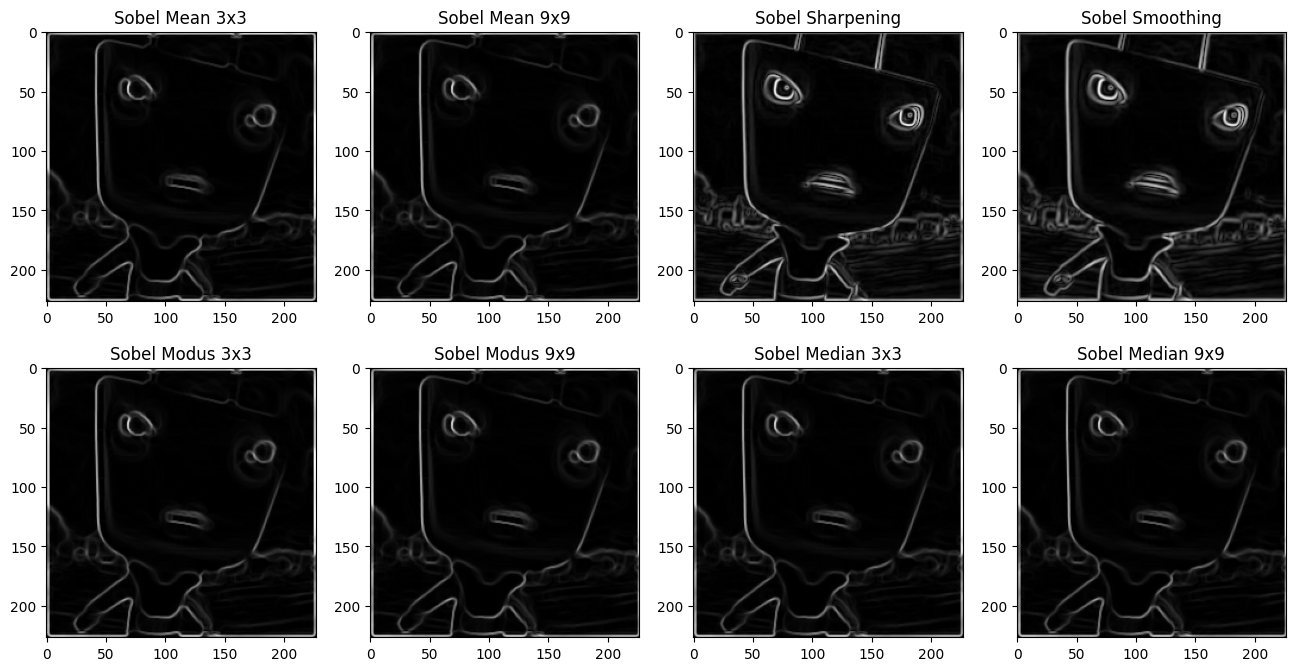

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(sobel_mean_3x3, cmap='gray')
plt.title('Sobel Mean 3x3')
plt.subplot(2,4,2)
plt.imshow(sobel_mean_9x9, cmap='gray')
plt.title('Sobel Mean 9x9')
plt.subplot(2,4,3)
plt.imshow(sobel_sharpening, cmap='gray')
plt.title('Sobel Sharpening')
plt.subplot(2,4,4)
plt.imshow(sobel_smoothing, cmap='gray')
plt.title('Sobel Smoothing')
plt.subplot(2,4,5)
plt.imshow(sobel_modus_3x3, cmap='gray')
plt.title('Sobel Modus 3x3')
plt.subplot(2,4,6)
plt.imshow(sobel_modus_9x9, cmap='gray')
plt.title('Sobel Modus 9x9')
plt.subplot(2,4,7)
plt.imshow(sobel_median_3x3, cmap='gray')
plt.title('Sobel Median 3x3')
plt.subplot(2,4,8)
plt.imshow(sobel_median_9x9, cmap='gray')
plt.title('Sobel Median 9x9')

Kode ini menerapkan deteksi tepi Prewitt pada berbagai hasil pemrosesan gambar menggunakan fungsi deteksi_tepi. PrewittX dan PrewittY digunakan untuk mengidentifikasi perubahan intensitas dalam arah horizontal dan vertikal. Teknik ini diterapkan pada gambar yang telah melalui berbagai filter, termasuk mean, sharpening, smoothing, modus, dan median, dengan ukuran kernel 3×3 dan 9×9. 


In [33]:
prewitt_mean_3x3 = deteksi_tepi(mean3x3, prewittX, prewittY, "prewitt")
prewitt_mean_9x9 = deteksi_tepi(mean9x9, prewittX, prewittY, "prewitt")
prewitt_sharpening = deteksi_tepi(sharpening, prewittX, prewittY, "prewitt")
prewitt_smoothing = deteksi_tepi(smoothing, prewittX,prewittY, "prewitt")
prewitt_modus_3x3 = deteksi_tepi(modus3x3, prewittX, prewittY, "prewitt")
prewitt_modus_9x9 = deteksi_tepi(modus9x9, prewittX, prewittY, "prewitt")
prewitt_median_3x3 = deteksi_tepi(median3x3, prewittX, prewittY, "prewitt")
prewitt_median_9x9 = deteksi_tepi(median9x9, prewittX, prewittY, "prewitt")

Kode ini menampilkan 8 hasil deteksi tepi Prewitt menggunakan Matplotlib. Setiap subplot menunjukkan bagaimana operator Prewitt bekerja pada gambar yang telah melalui berbagai filter seperti mean, sharpening, smoothing, modus, dan median, dengan ukuran kernel 3×3 dan 9×9. Visualisasi dalam skala grayscale (cmap='gray') memungkinkan analisis efek masing-masing metode terhadap deteksi tepi dalam gambar. 


Text(0.5, 1.0, 'Prewitt Median 9x9')

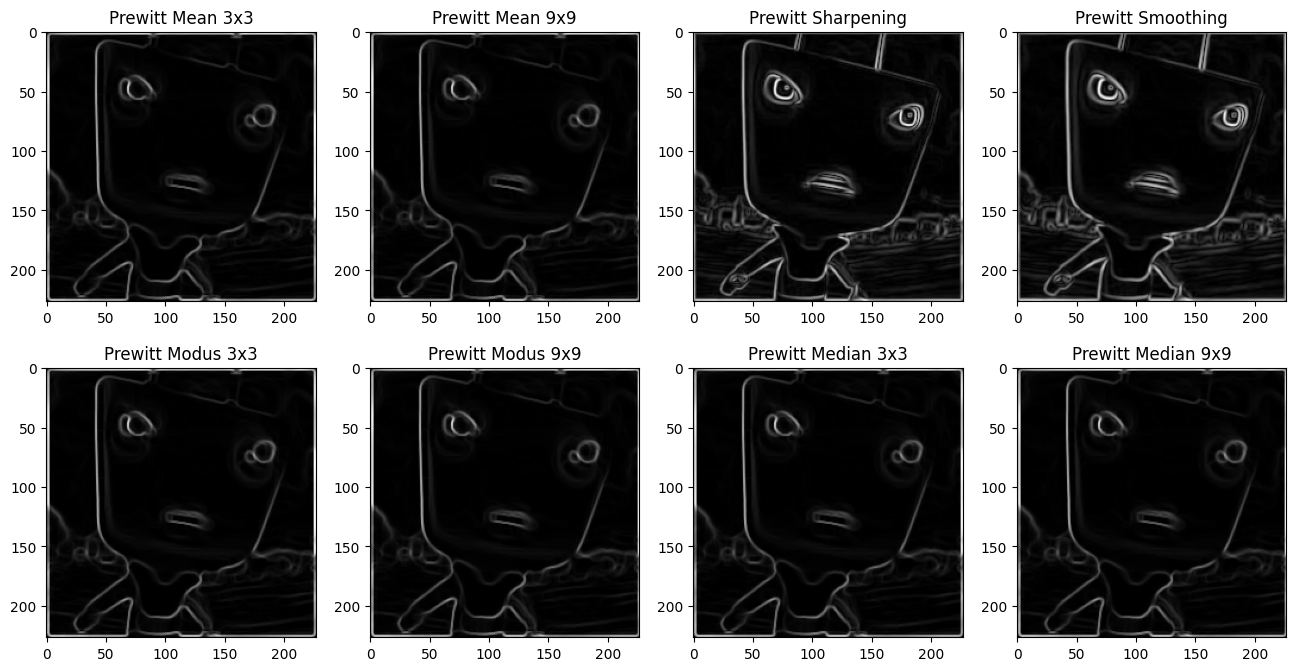

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(prewitt_mean_3x3, cmap='gray')
plt.title('Prewitt Mean 3x3')
plt.subplot(2,4,2)
plt.imshow(prewitt_mean_9x9, cmap='gray')
plt.title('Prewitt Mean 9x9')
plt.subplot(2,4,3)
plt.imshow(prewitt_sharpening, cmap='gray')
plt.title('Prewitt Sharpening')
plt.subplot(2,4,4)
plt.imshow(prewitt_smoothing, cmap='gray')
plt.title('Prewitt Smoothing')
plt.subplot(2,4,5)
plt.imshow(prewitt_modus_3x3, cmap='gray')
plt.title('Prewitt Modus 3x3')
plt.subplot(2,4,6)
plt.imshow(prewitt_modus_9x9, cmap='gray')
plt.title('Prewitt Modus 9x9')
plt.subplot(2,4,7)
plt.imshow(prewitt_median_3x3, cmap='gray')
plt.title('Prewitt Median 3x3')
plt.subplot(2,4,8)
plt.imshow(prewitt_median_9x9, cmap='gray')
plt.title('Prewitt Median 9x9')

Kode ini membaca gambar "boboiboy.jpg" menggunakan plt.imread() dan menampilkannya dengan plt.imshow().


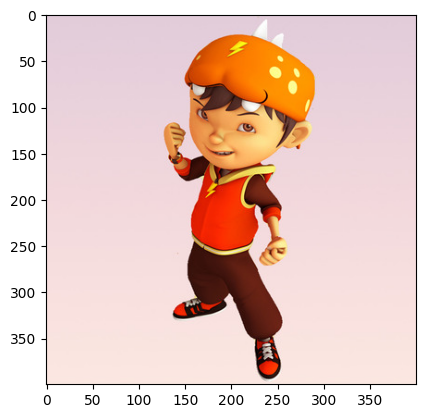

In [35]:
boboiboy = plt.imread("boboiboy.jpg")
plt.imshow(boboiboy)

Kode ini membaca gambar "boboiboy.jpg" menggunakan Matplotlib (plt.imread), lalu mengonversinya menjadi grayscale menggunakan OpenCV (cv.cvtColor) dengan parameter cv.COLOR_BGR2GRAY. Terakhir, gambar yang telah dikonversi ditampilkan dalam skala abu-abu (cmap='gray')


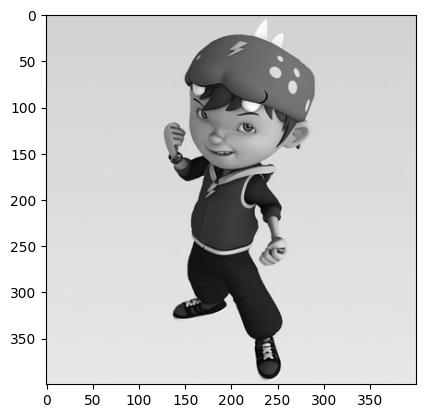

In [36]:
boboiboyGR = plt.imread("boboiboy.jpg")
boboiboyGR = cv.cvtColor(boboiboyGR, cv.COLOR_BGR2GRAY)
plt.imshow(boboiboyGR, cmap = 'gray')

Kode ini menerapkan konvolusi dengan kernel 3×3 pada gambar "boboiboy.jpg" yang telah dikonversi ke grayscale. Kernel ini menghitung rata-rata nilai piksel di sekitar setiap titik, menghasilkan efek perataan (smoothing) untuk mengurangi noise dan variasi intensitas dalam gambar. Hasilnya kemudian ditampilkan dalam skala grayscale menggunakan Matplotlib (cmap='gray'). 

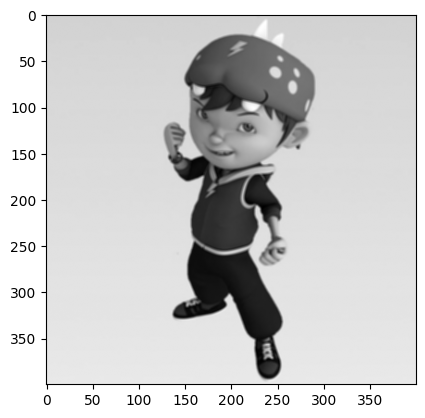

In [54]:
boboiboy_mean_3x3 = konvolusi(boboiboyGR, kernel3)
plt.imshow(boboiboy_mean_3x3, cmap = 'gray')

Kode ini menerapkan deteksi tepi Prewitt pada gambar "boboiboy.jpg" yang telah mengalami konvolusi dengan kernel 3×3 untuk perataan sebelumnya. Metode Prewitt digunakan untuk menyoroti perubahan intensitas piksel dalam arah horizontal dan vertikal, membantu mengidentifikasi tepi dan batas objek dalam gambar. 


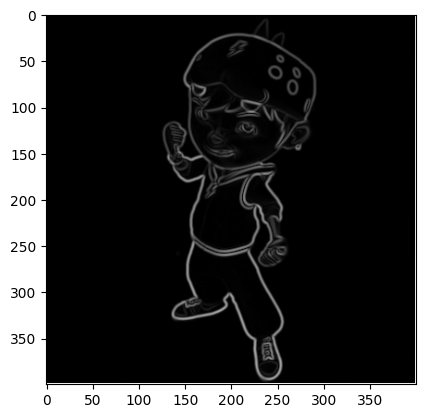

In [56]:
boboiboy_prewitt = deteksi_tepi(boboiboy_mean_3x3, prewittX, prewittY, "prewitt")
plt.imshow(boboiboy_prewitt, cmap = 'gray')

Kode ini menerapkan thresholding pada gambar "boboiboy.jpg" yang telah dikonversi ke grayscale. Fungsi thresholding membandingkan setiap piksel dengan nilai ambang (threshold) yang telah ditentukan, dalam hal ini 200. Jika nilai piksel lebih kecil atau sama dengan threshold, maka piksel diubah menjadi 255 (putih), sedangkan jika lebih besar, diubah menjadi 0 (hitam).


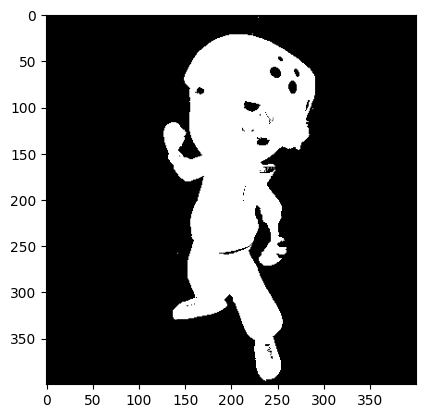

In [48]:
def thresholding(img, threshold, min_val, max_val):
    img = img.astype(np.uint8)
    pixel = np.where(img <= threshold, max_val, min_val).astype(np.uint8)
    return pixel

boyThres = thresholding(boboiboyGR, 200, 0, 255)

plt.imshow(boyThres, cmap='gray')
plt.show()

Kode ini menerapkan konvolusi dengan kernel 3×3 pada hasil thresholding gambar "boboiboy.jpg". Proses ini membantu menghaluskan gambar setelah thresholding, mereduksi noise, dan mempertajam fitur utama dengan mempertimbangkan nilai piksel di sekitar setiap titik. Hasil akhirnya ditampilkan dalam skala grayscale (cmap='gray') menggunakan Matplotlib.

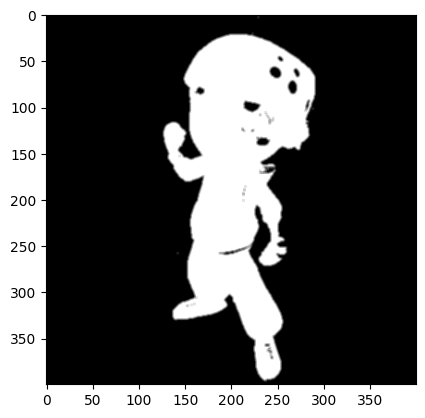

In [55]:
boboythrmed = konvolusi(boyThres, kernel3)

plt.imshow(boboythrmed, cmap = 'gray')

Kode ini memisahkan setiap kanal warna dari gambar "boboiboy.jpg", yaitu merah (Bmerah), hijau (Bhijau), dan biru (Bbiru). Setiap kanal diperoleh dengan mengekstrak satu elemen dari dimensi terakhir array gambar. Kemudian, hasilnya divisualisasikan menggunakan Matplotlib dalam tiga subplot, masing-masing dengan colormap yang sesuai: "Reds", "Greens", dan "Blues".


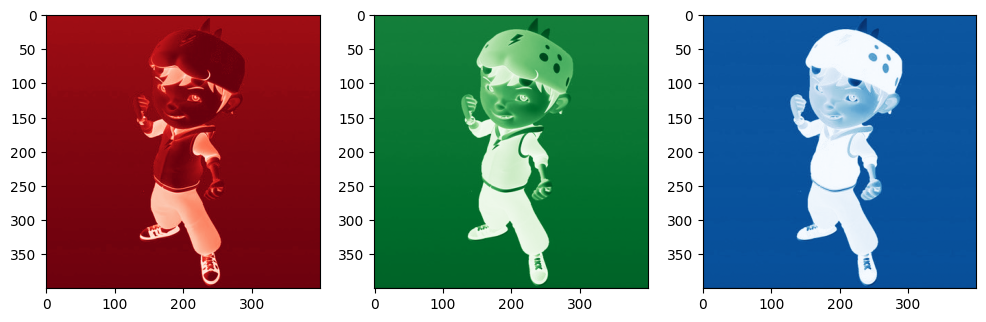

In [50]:
Bmerah = boboiboy[:, :, 0]
Bhijau = boboiboy [:, :, 1]
Bbiru = boboiboy[:, :, 2]

plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
plt.imshow(Bmerah, cmap = "Reds")

plt.subplot(1,3,2)
plt.imshow(Bhijau, cmap = "Greens")

plt.subplot(1,3,3)
plt.imshow(Bbiru, cmap = "Blues")

Kode ini menggabungkan segmentasi warna, deteksi tepi Sobel, dan pewarnaan adaptif pada gambar "boboiboy.jpg". Masking kecerahan digunakan untuk mempertahankan area dengan intensitas rendah, memungkinkan pemrosesan lebih terfokus. Deteksi tepi Sobel diterapkan untuk menyoroti batas objek, sementara fungsi ultra_instinct mengubah setiap kanal warna menjadi versi berwarna sesuai dengan colormap yang dipilih, dengan latar belakang pastel untuk meningkatkan kontras. Kontur tepi kemudian diberikan warna yang sesuai dengan masing-masing kanal (merah, hijau, atau biru),


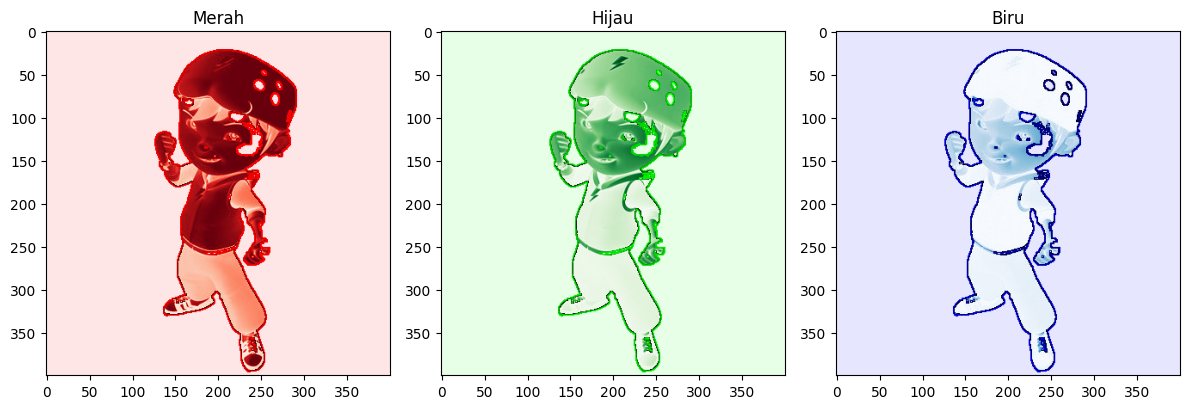

In [51]:
brightness = boboiboy.mean(axis=2)
mask = (brightness < 200).astype(np.uint8)

def sobel_edge_mask(mask, threshold=0):
    gx = np.zeros_like(mask, dtype=np.float32)
    gy = np.zeros_like(mask, dtype=np.float32)
    padded = np.pad(mask, 1, mode='reflect')

    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            region = padded[i:i+3, j:j+3]
            gx[i, j] = np.sum(region * sobelX)
            gy[i, j] = np.sum(region * sobelY)

    magnitude = np.sqrt(gx**2 + gy**2)
    return (magnitude > threshold)

def ultra_instinct(channel, cmap_name, pastel_color, mask, color_channel='red'):
    cmap = plt.get_cmap(cmap_name)
    colored = cmap(channel / 255.0)[:, :, :3]
    colored = (colored * 255).astype(np.uint8)

    pastel_bg = np.ones_like(colored) * pastel_color
    hasil = np.where(mask[:, :, None] == 1, colored, pastel_bg)

    edge = sobel_edge_mask(mask)

    edge_rgb = np.zeros_like(hasil)
    if color_channel == 'red':
        edge_rgb[:, :, 0] = channel
    elif color_channel == 'green':
        edge_rgb[:, :, 1] = channel
    elif color_channel == 'blue':
        edge_rgb[:, :, 2] = channel

    hasil[edge] = edge_rgb[edge]
    return hasil

pastel_merah = [255, 230, 230]
pastel_hijau = [230, 255, 230]
pastel_biru  = [230, 230, 255]

boymer = ultra_instinct(Bmerah, "Reds", pastel_merah, mask, color_channel='red')
boyjo = ultra_instinct(Bhijau, "Greens", pastel_hijau, mask, color_channel='green')
boybi  = ultra_instinct(Bbiru,  "Blues", pastel_biru, mask, color_channel='blue')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(boymer)
plt.title("Merah")

plt.subplot(1, 3, 2)
plt.imshow(boyjo)
plt.title("Hijau")

plt.subplot(1, 3, 3)
plt.imshow(boybi)
plt.title("Biru")

plt.tight_layout()
plt.show()


Kode ini menggabungkan tiga kanal warna dari hasil pemrosesan gambar "boboiboy.jpg" menjadi satu gambar berwarna penuh. Dengan menggunakan np.zeros_like(boybi), array kosong dibuat dengan ukuran yang sama seperti kanal biru, kemudian setiap kanal warna diisi dengan hasil dari masing-masing pemrosesan warna. Teknik ini memungkinkan integrasi hasil pemrosesan individual menjadi satu kesatuan visual yang utuh, 


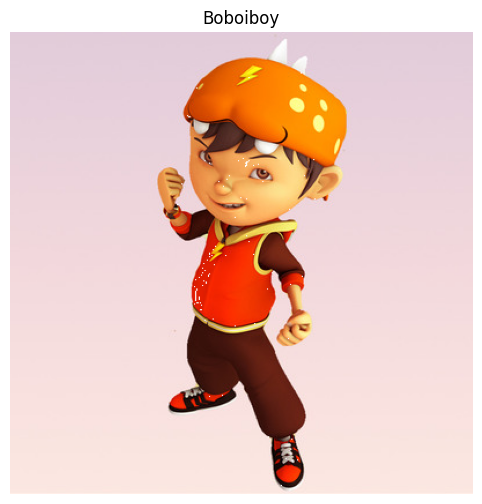

In [88]:
boymer = boboiboy[:, :, 0]  
boyjo = boboiboy[:, :, 1]  
boybi = boboiboy[:, :, 2]  

gambar_final = np.ones_like(boboiboy) * 255  

mask = (boymer + boyjo + boybi) > 0 

gambar_final[:, :, 0] = np.where(mask, boymer, 255)  
gambar_final[:, :, 1] = np.where(mask, boyjo, 255)   
gambar_final[:, :, 2] = np.where(mask, boybi, 255)   

plt.figure(figsize=(12, 6))
plt.imshow(gambar_final)
plt.title("Boboiboy")
plt.axis('off') 
plt.show()